#American Time Use Survey Analysis
##Comparison Based on Employment Status
For the purposes of this analysis we will consider employed people to be those actively working at their jobs (i.e non-absent) and unemployed people to be those who identified as looking for a job.



##Data Setup

In [1]:
import pandas as pd
import re
import seaborn
import math
from atus import atus
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
summary = pd.read_csv("atusdata/atussum_2013/atussum_2013.dat")
activity = pd.read_csv("atusdata/atusact_2013/atusact_2013.dat")
respondents = pd.read_csv("atusdata/atusresp_2013/atusresp_2013.dat")

In [4]:
atus.combine_activities(summary)

In [5]:
employed_crit = summary.TELFS == 1
unemployed_crit = summary.TELFS == 4

In [6]:
employed_data = summary[employed_crit]
unemployed_data = summary[unemployed_crit]
nonwork = summary[summary.TELFS == 5]
unemployed_respondents = respondents[unemployed_crit]

In [7]:
employed_averages = atus.average_all(employed_data, r't\d+')
unemployed_averages = atus.average_all(unemployed_data, r't\d+')
employed_sum = atus.average_all(employed_data, r'[^TtPG]')
unemployed_sum = atus.average_all(unemployed_data, r'[^TtPG]')

In [8]:
data = {"employed": employed_averages, "unemployed": unemployed_averages}
data2 = {"employed": employed_sum, "unemployed": unemployed_sum}
employment_data = pd.DataFrame(data=data, index=atus.get_columns(summary, r't\d+'))
employment_sum = pd.DataFrame(data=data2, index=atus.get_columns(summary, r'[^TtPG]'))

In [9]:
job_search = unemployed_respondents.loc[:,["TUCASEID", "TELKM1", "TULKM2", "TULKM3", "TULKM4", "TULKM5", "TULKM6",
                "TULKDK1", "TULKDK2", "TULKDK3", "TULKDK4", "TULKDK5", "TULKDK6", 
                "TULKPS1", "TULKPS2", "TULKPS3", "TULKPS4", "TULKPS5", "TULKPS6"]]
job_search = job_search.replace(-1, 0)
job_search = job_search.replace(97, 0)

In [10]:
age1 = summary.TEAGE <= 20
age2 = (summary.TEAGE > 20) & (summary.TEAGE <= 30)
age3 = (summary.TEAGE > 30) & (summary.TEAGE <= 40)
age4 = (summary.TEAGE > 40) & (summary.TEAGE <= 50)
age5 = (summary.TEAGE > 50) & (summary.TEAGE <= 60)
age6 = (summary.TEAGE > 60) & (summary.TEAGE <= 70)

In [11]:
%%capture
age_data = {"20 or Under": [employed_data[age1].count()[0], unemployed_data[age1].count()[0]],
             "21-30": [employed_data[age2].count()[0], unemployed_data[age2].count()[0]],
             "31-40": [employed_data[age3].count()[0], unemployed_data[age3].count()[0]],
             "41-50": [employed_data[age4].count()[0], unemployed_data[age4].count()[0]],
             "51-60": [employed_data[age5].count()[0], unemployed_data[age5].count()[0]],
             "61-70": [employed_data[age6].count()[0], unemployed_data[age6].count()[0]]}
nonwork_data = {"20 or Under": [nonwork[age1].count()[0]],
                "21-30": nonwork[age2].count()[0],
                "31-40": nonwork[age3].count()[0],
                "41-50": nonwork[age4].count()[0],
                "51-60": nonwork[age5].count()[0],
                "61-70": nonwork[age6].count()[0]}
nonwork_ages = pd.DataFrame(data=nonwork_data, index=["Non-Workforce"])
ages = pd.DataFrame(data=age_data, index=["Employed", "Unemployed"])

#Age Distribution

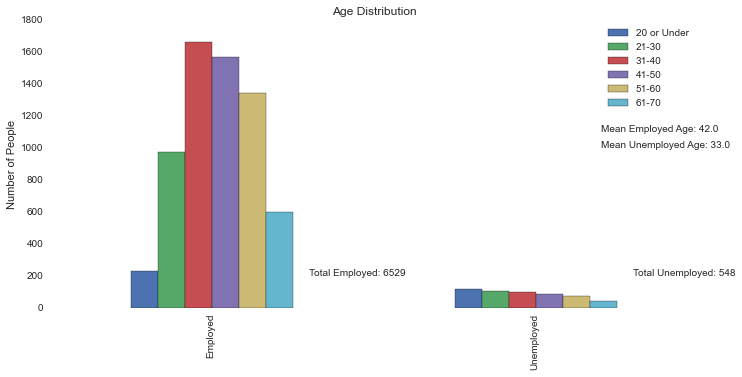

In [12]:
employed_mean = atus.weighted_average(employed_data, "TEAGE")
unemployed_mean = atus.weighted_average(unemployed_data, "TEAGE")
num_employed = employed_data.count()[0]
num_unemployed = unemployed_data.count()[0]

ages.plot(kind="bar")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.text(1.2, 1100, 'Mean Employed Age: {}'.format(round(employed_mean), 4))
plt.text(1.2, 1000, 'Mean Unemployed Age: {}'.format(round(unemployed_mean), 4))
plt.text(0.3, 200, 'Total Employed: {}'.format(num_employed))
plt.text(1.3, 200, 'Total Unemployed: {}'.format(num_unemployed))
plt.title("Age Distribution")
plt.ylabel("Number of People")
plt.show()

The first and most important thing we notice from this comparison is the difference in size between our sample groups.  The sample of employed individuals is over ten times the size of the sample of unemployed individuals.  As a result, it is important to take our conclusions drawn from the unemployed sample with a grain of salt.  That said, it appears from these data that the ages for unemployed fall off linearly as age increases while the ages for the employed fall in a roughly normal distribution.  At younger ages, it follows that if more people are unemployed fewer will be employed.  This segment of the workforce also represents many people who are still in in school or who have recently graduated and are just finding their first jobs, so it is understandable that a larger percentage of them will still be looking for one.  People in the 40-60 range are likely to be established in their careers and have more experience, making it easier to find and hold jobs than some of their younger counterparts.  For 60 and over, people are well into retirement age, so we would expect people to begin to drop out of the workforce and therefore out of both employed and unemployed groups and that is exactly what we see (see figure below for non-workforce age distribution).

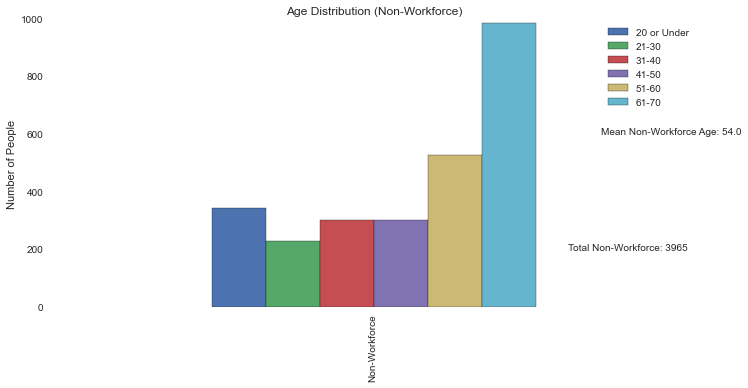

In [13]:
nonwork_mean = atus.weighted_average(nonwork, "TEAGE")
num_nonwork = nonwork.count()[0]

nonwork_ages.plot(kind="bar")
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.text(0.35, 600, 'Mean Non-Workforce Age: {}'.format(round(nonwork_mean), 4))
plt.text(0.3, 200, 'Total Non-Workforce: {}'.format(num_nonwork))
plt.title("Age Distribution (Non-Workforce)")
plt.ylabel("Number of People")
plt.show()

We see that the distribution of ages for those not in the workforce is essentially the inverse of that for the employed sample, as we would expect.

#Time Distribution

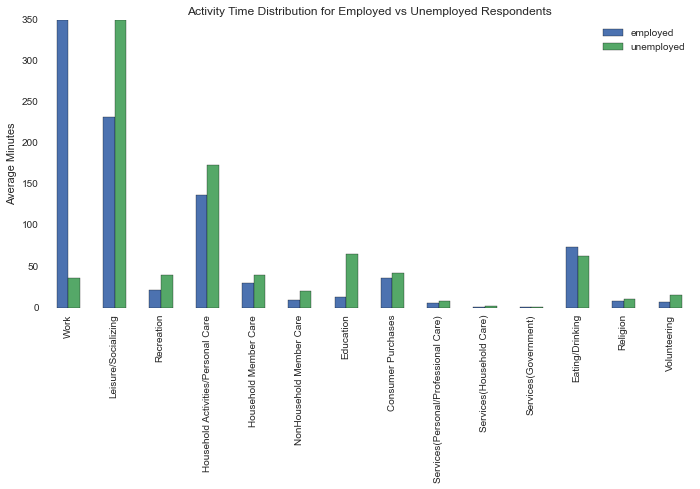

In [14]:
employment_sum.plot(kind='bar')
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.title("Activity Time Distribution for Employed vs Unemployed Respondents")
plt.ylabel("Average Minutes")
plt.show()

From the overall time distribution, we can see that people in the unemployed sample spent much less time with work related activities (which includes job search related activities) than the people in the employed sample, which is completely what we would expect.  Likely as a result of the extra time available from not working, people in the unemployed sample spent more time in almost every other category, especially leisure and education (they also had strong percentage increases in other areas such as recreation, non-household member care, and volunteering). It is important however to take into account that people reported only one activity for each given period of time in their day and so some activities will be reported to the exclusion of others (for example, having lunch with friends might be reported as socializing rather than eating, which could account for the higher amount of reported time spent eating by the employed sample).  In the following figures we will example time distribution breakdowns of several of these activity groups into more specific activities.

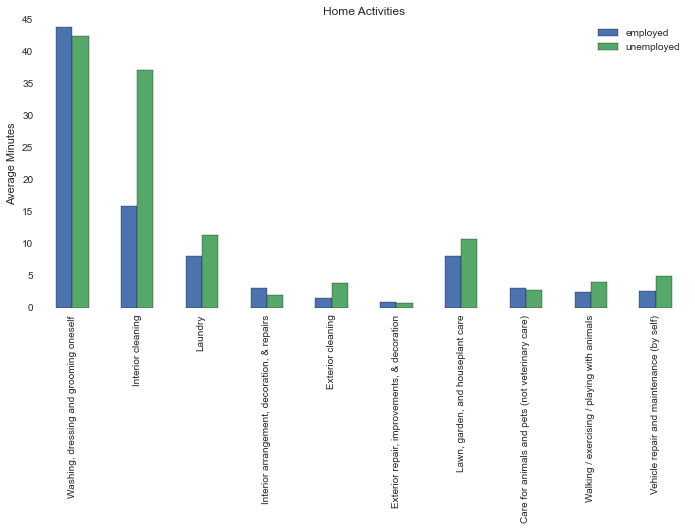

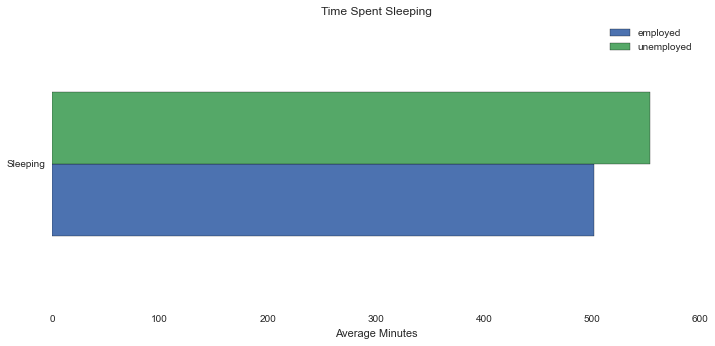

In [15]:
employment_data.loc[["t010201", "t020101", "t020102", 
                     "t020301", "t020401", "t020402", "t020501", 
                     "t020601", "t020602", "t020701"],:].plot(kind='bar')
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.title("Home Activities")
plt.ylabel("Average Minutes")
plt.xticks(range(10),['Washing, dressing and grooming oneself', 'Interior cleaning', 
                      'Laundry', 'Interior arrangement, decoration, & repairs', 'Exterior cleaning',
                      'Exterior repair, improvements, & decoration', 'Lawn, garden, and houseplant care',
                      'Care for animals and pets (not veterinary care)', 'Walking / exercising / playing with animals',
                      'Vehicle repair and maintenance (by self)'])
plt.show()

employment_data.loc[["t010101"],:].plot(kind='barh')
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.title("Time Spent Sleeping")
plt.xlabel("Average Minutes")
plt.yticks(range(1),['Sleeping'])
plt.show()

(Note: all activities listed above as "Home activities" are those performed by the respondents themselves, not using any outside services)

On the homefront, we see that from our sample it appears that the unemployed spend a substantially larger amount of time cleaning, both interior and exterior, than the employed.  As before, this is likely a result of the unemployed have more opportunity to be at home.  Interestingly, it appears that the employed spend more (although probably not significantly more) time on interior decoration, arrangement, and repair.  They also spend a nearly equal amount of time on pet care, which makes sense as pets are going to require certain amounts of care regardless of their owners' employment status.  The difference there comes in play time with pets, where once again the unemployed sample spent more time on average.  Personal grooming was another area where both groups spent relatively the same amount of time, which again makes sense; it is equally important for people who are going to work and for people going to interviews to look and feel professional.  Also, most people just have their own personal maintainence routines that are often fairly consistent regardless of situation.


Because it takes up such a large amount of time, we have graphed time spent sleeping separately.  Comparing the two groups, we find that the unemployed sleep on average approximately an hour longer than the employed who average about 8.5 hours a night. Not having to be somewhere every morning at a specific time likely allows the unemployed to sleep in more frequently (although one might expect the opposite is true for those of the unemployed who are also students).

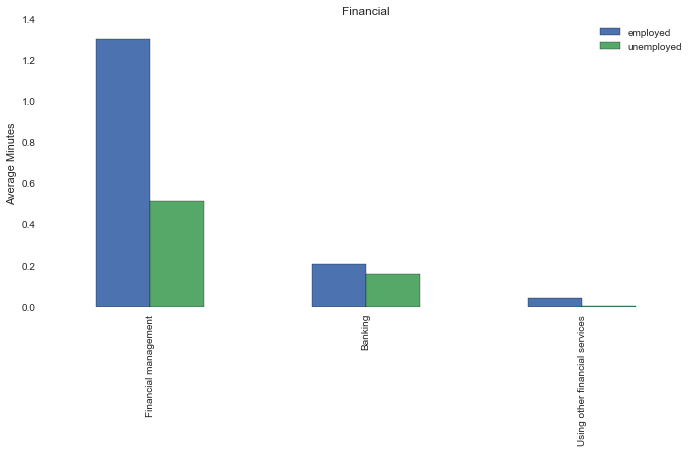

In [16]:
employment_data.loc[["t020901", "t080201", "t080202"],:].plot(kind='bar')
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.title("Financial")
plt.ylabel("Average Minutes")
plt.xticks(range(3),['Financial management', 'Banking', 'Using other financial services'])
plt.show()

Time spent on financial activities does not appear to amount to a large portion of the average person's day, although it is an area where the people in the employed sample spend more time.  Time spent on financial management in particular appears to be an area where the employed exceed the unemployed on average in our samples.  While it might seem potentially intuitive that the unemployed would need to manage their finances more carefully without a steady income supply, it also is understandable that a steady income supply requires managing and budgeting.  Add to that the fact that the largest group of people in our unemployed sample are 20 or under and potentially receiving financial aid from family or learning institutions and therefore are not managing their own finances as much, and it makes some sense that the employed group spends more time on average managing their money.  This holds true as well for the use of other financial services, which include accountants and stock-brokers, whose services are potentially more useful to people with an active income supply.

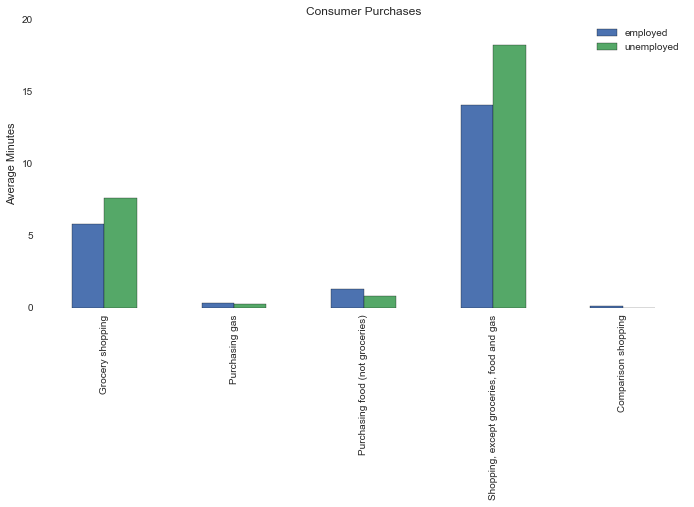

In [17]:
employment_data.loc[["t070101", "t070102", "t070103", "t070104", "t070201"],:].plot(kind='bar')
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.title("Consumer Purchases")
plt.ylabel("Average Minutes")
plt.xticks(range(5),['Grocery shopping', 'Purchasing gas', 'Purchasing food (not groceries)', 
                     'Shopping, except groceries, food and gas', 'Comparison shopping'])
plt.show()

At first glance it may seem odd that the people in our unemployed sample spent more time on average shopping than the people in our employed sample.  Time spent, however, does not necessarily equate to money spent.  Indeed, if we look at the examples provided in the survey under "Shopping, except groceries, food, and gas" we see "window shopping", "browsing/shopping but not yet buying", and "looking through catalogs" as well as examples pertaining to making returns, none of which involve spending money.  The one category where the employed spend more time on average is purchasing non-grocery food, i.e. eating out, which is an activity that is generally more expensive (especially compared to eating at home).

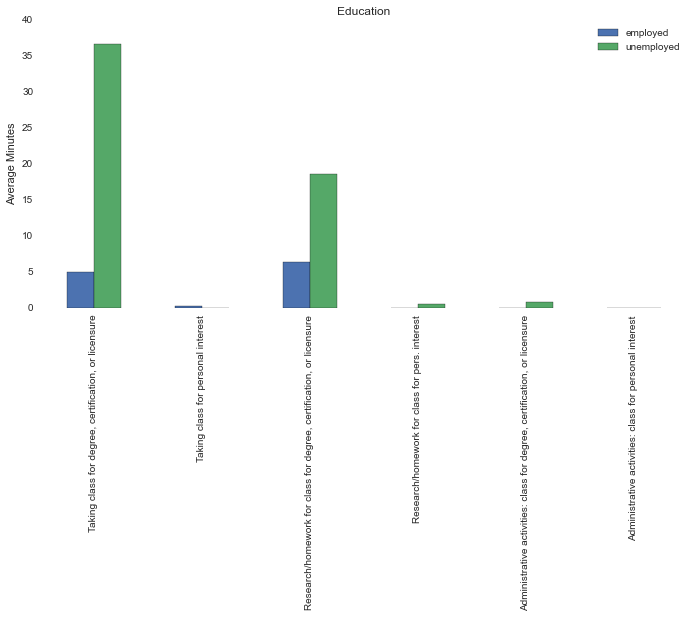

In [18]:
employment_data.loc[["t060101", "t060102", "t060301", "t060302", "t060401", "t060402"],:].plot(kind='bar')
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.title("Education")
plt.ylabel("Average Minutes")
plt.xticks(range(6),['Taking class for degree, certification, or licensure', 'Taking class for personal interest',
                     'Research/homework for class for degree, certification, or licensure', 
                     'Research/homework for class for pers. interest',
                     'Administrative activities: class for degree, certification, or licensure',
                     'Administrative activities: class for personal interest'])
plt.show()

Since a larger percentage of people in the unemployed sample belong to the 20 and under age group, we would expect a larger percentage of those people to spend time in educational pursuits as that is an age range typically associated with students.  The data backs up this assertion, showing that the people in our unemployed sample spend substantially more time attending class and doing homework than those in the employed sample.

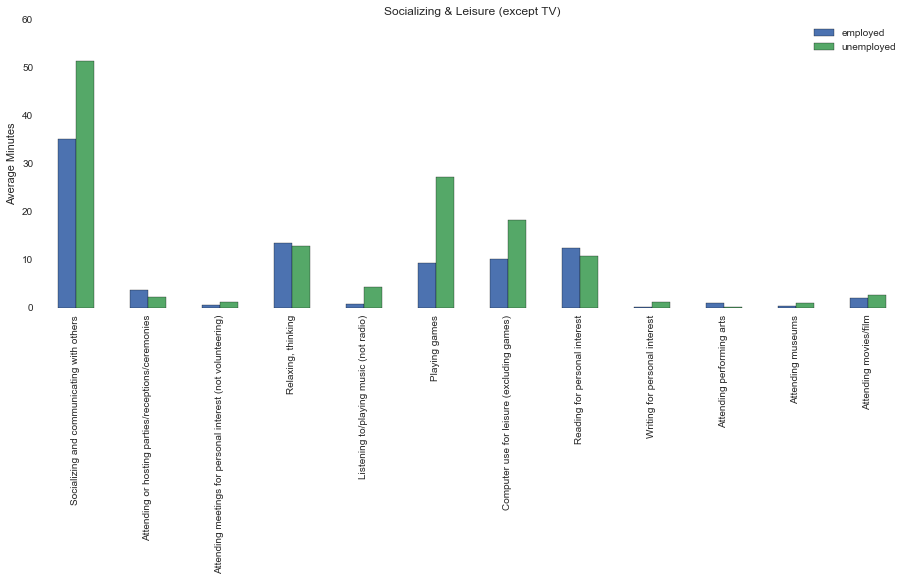

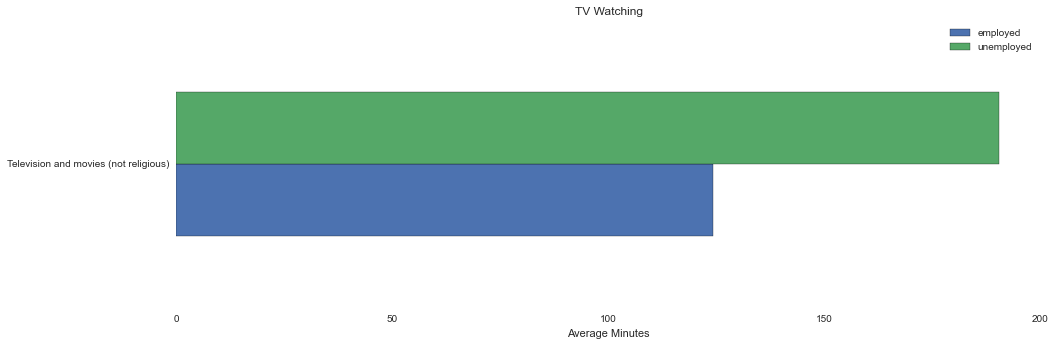

In [19]:
employment_data.loc[["t120101", "t120201", "t120202", "t120301", 
                     "t120306", "t120307", "t120308", "t120312", 
                     "t120313", "t120401", "t120402", "t120403"],:].plot(kind='bar')
plt.title("Socializing & Leisure (except TV)")
plt.ylabel("Average Minutes")
plt.xticks(range(12),['Socializing and communicating with others', 
                      'Attending or hosting parties/receptions/ceremonies',
                      'Attending meetings for personal interest (not volunteering)', 'Relaxing, thinking', 
                      'Listening to/playing music (not radio)', 'Playing games',
                      'Computer use for leisure (excluding games)', 'Reading for personal interest',
                      'Writing for personal interest', 'Attending performing arts', 'Attending museums',
                      'Attending movies/film'])
plt.subplots_adjust(left=2, right=4, top=3, bottom=2)
                      
plt.show()

employment_data.loc[["t120303"],:].plot(kind='barh')
plt.title("TV Watching")
plt.xlabel("Average Minutes")
plt.yticks(range(1),['Television and movies (not religious)'])
plt.subplots_adjust(left=2, right=4, top=3, bottom=2)
                      
plt.show()

Once again, the unemployed sample spends more time on most leisure activities than the employed sample.  Both groups spend a substantial amount of time on leisure, however, with TV watching and socializing having much higher average times than most other activities for each group.  Across the activities sampled here, there are a few where the employed exceed or match the unemployed, namely Attending/Hosting Parties, Relaxing/Thinking, Reading, Attending Performing Arts, and Attending Movies.  It is interesting to note that these activities either fall into the category of time spent alone or time spent out with others, catering to introverts and extroverts, respectively.  It may be that with limited time for leisure and with the stresses that can be associated with a job, a higher percentage of employed people place importance on activities that "recharge their batteries" so to speak over those, like playing games or watching TV, that primarily entertain.

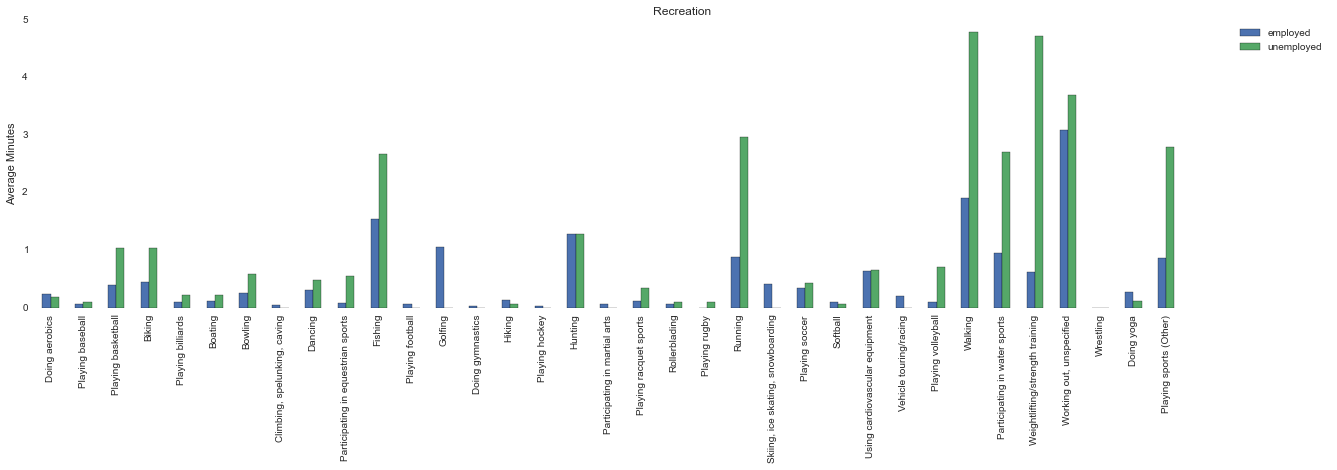

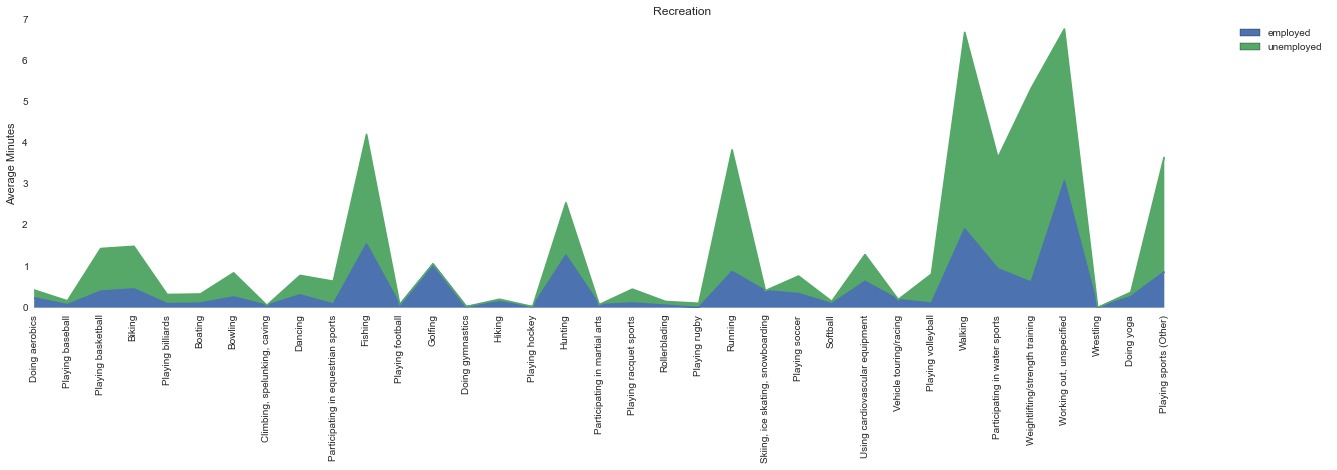

In [20]:
recreations = atus.get_columns(summary, r't1301')
xlabels = ['Doing aerobics', 'Playing baseball', 'Playing basketball', 'Biking', 'Playing billiards',
           'Boating', 'Bowling', 'Climbing, spelunking, caving', 'Dancing', 'Participating in equestrian sports',
           'Fishing', 'Playing football', 'Golfing', 'Doing gymnastics', 'Hiking', 'Playing hockey', 'Hunting',
           'Participating in martial arts', 'Playing racquet sports', 'Rollerblading', 'Playing rugby', 'Running',
           'Skiing, ice skating, snowboarding', 'Playing soccer', 'Softball', 'Using cardiovascular equipment',
           'Vehicle touring/racing', 'Playing volleyball', 'Walking', 'Participating in water sports',
           'Weightlifting/strength training', 'Working out, unspecified', 'Wrestling', 'Doing yoga',
           'Playing sports (Other)']
employment_data.loc[recreations,:].plot( kind='bar')
plt.subplots_adjust(left=2, right=5, top=3, bottom=2)
plt.title("Recreation")
plt.ylabel("Average Minutes")
plt.xticks(range(40), xlabels)
employment_data.loc[recreations,:].plot(kind="area")
plt.subplots_adjust(left=2, right=5, top=3, bottom=2)
plt.title("Recreation")
plt.ylabel("Average Minutes")
plt.xticks(range(40), xlabels, rotation=90)
plt.show()

Neither group spent nearly as much time on average participating in sports or other recreation (especially compared to the leisure activities), but the unemployed did still spent more time on most recreation activities over the employed.  Notably, the unemployed sample spent over twice the time on Basketball, Biking, Equestrian Sports, Raquet Sports, Running, Volleyball, Walking, Weightlifting, and Watersports.  Most of these can require a significant time investment but, with the exception of equestrian sports and possibly watersports, not a significant monetary expenditure.  On the opposite side, the areas where employed people spent more time, such as Golfing, Hiking, Skiing and Vehicle Touring, often do require a substantial monetary commitment. One rather interesting activity is Hunting, which both groups spent a nearly equal amount of time on average participating in.  Perhaps is one is a hunter, one will hunt regardless of situation.

(Note: the area plot is intended to help visualize the overall differences in time spent across the varying activities, as there were enough of them that it was potentially difficult to see in the bar plot)

#Job Searching

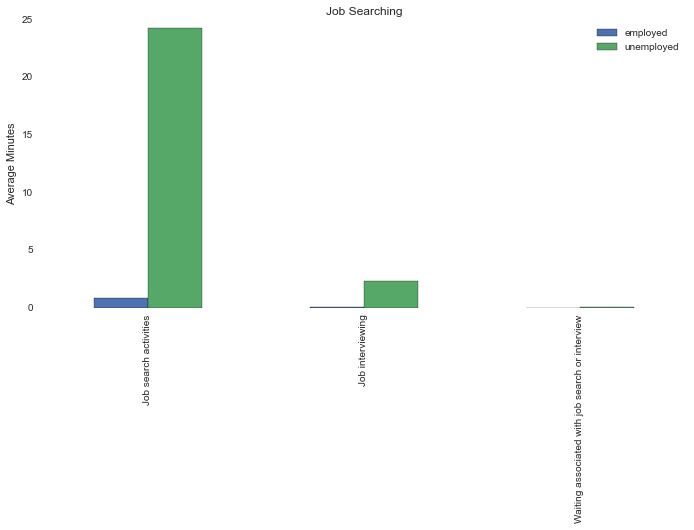

In [21]:
employment_data.loc[["t050401", "t050403", "t050404"],:].plot(kind='bar')
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)
plt.title("Job Searching")
plt.ylabel("Average Minutes")
plt.xticks(range(3),['Job search activities', 'Job interviewing', 'Waiting associated with job search or interview'])
plt.show()

As would certainly be expected, the unemployed sample spent significantly more time on job search activities than the employed group.  The employed group did spend a small amount of time on average searching for a job, which we could presume as those people who are employed but wish for a different/better job.  It is interesting that the unemployed spent only around 30 minutes a day on average looking for a job, as it seems like a small amount of time to spend on such an important pursuit.  If we recall, however, that a large percentage of our unemployed sample are likely students, this lower average time may make more sense as employment might be more optional for students or that might have less time in general due to class work to pursue a job.

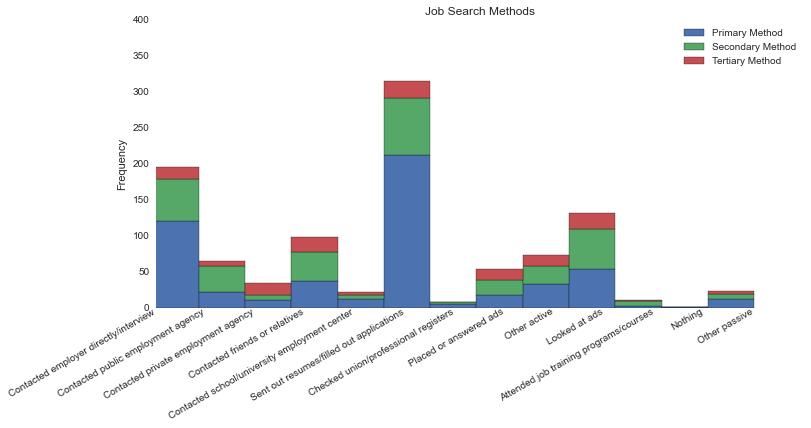

In [22]:
job_search.loc[:,["TELKM1", "TULKM2", "TULKM3"]].plot(kind="hist", stacked=True, bins=14, legend=False)

plt.xticks(range(1,14), ["Contacted employer directly/interview","Contacted public employment agency",
            "Contacted private employment agency","Contacted friends or relatives",
            "Contacted school/university employment center","Sent out resumes/filled out applications",
            "Checked union/professional registers","Placed or answered ads","Other active",
            "Looked at ads","Attended job training programs/courses","Nothing", "Other passive"],
            rotation=30, rotation_mode="anchor", va="bottom", ha="right")
plt.xlim(xmin=1)
plt.ylim(ymax=400)
plt.ylabel("Frequency")
plt.title("Job Search Methods")
plt.legend(labels=["Primary Method", "Secondary Method", "Tertiary Method"])
plt.subplots_adjust(left=2, right=3.5, top=3, bottom=2)

The figure above shows the frequency of various job search methods amongst our unemployed sample.  The different colors correspond to methods employed as primary, secondary, and tertiary ways of seeking a job.  By for the most popular method was filling out applications and sending out resumes, followed by directly contacting potential employers.  Given that a large percentage of the unemployed sample are likely students, it is interesting to note that only a small segment of the sample took advantage of school-based resources for job placement.  Some methods were favored as secondary or tertiary methods over primary, such as Contacting Friends/Relatives, Attending Job Training Programs, and Contacting Private Employment Agencies.  For the latter of those two, there is probably a cost associated with those methods which may be why they are not as likely to be primary methods of job seeking.

#Conclusions
While it may be difficult to draw statistically significant conclusions from these data given the sizes of our samples, particularly for the unemployed sample, we can comment on the overall trends we see in the data.  The most obvious conclusion is that the unemployed are able to allocate much of the time that would normally be taken up by a job to other pursuits, be they leisure or home cleaning.  There are potentially some patterns we can comment on, such as the activities where the employed tend to spend as much or more time on average as the unemployed are those that are more necessary such as pet care and personal grooming, or those that require monetary investment, such as golfing, working with a stock broker, or eating out.  Ideally, however, a larger sample size for both groups would be needed before any true relationships or correlations could be determined with statistical significance. It is still an interesting comparison though, regardless.